##NETFLIX STOCK PRICE PREDICTION MODEL

In [54]:
import numpy as np
import pandas as pd

In [55]:
netflix=pd.read_csv('NFLX.csv')
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


## DATA PREPROCESSING


##Working with date

In [56]:
netflix['Date']=pd.to_datetime(netflix['Date'])

In [57]:
netflix['year']=netflix['Date'].dt.year
netflix['month']=netflix['Date'].dt.month
netflix['day']=netflix['Date'].dt.day

In [58]:
netflix.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28


In [59]:
netflix.drop('Date',axis=1,inplace=True)

In [60]:
netflix

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24
2,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28
3,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,5,29
4,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,5,30
...,...,...,...,...,...,...,...,...,...
5039,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,2022,5,27
5040,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,2022,5,31
5041,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,2022,6,1
5042,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,2022,6,2


##SOME QUESTIONS

In [61]:
netflix.shape

(5044, 9)

In [62]:
netflix.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
year         0
month        0
day          0
dtype: int64

In [63]:
netflix.duplicated().sum()

np.int64(0)

In [64]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5044 non-null   float64
 1   High       5044 non-null   float64
 2   Low        5044 non-null   float64
 3   Close      5044 non-null   float64
 4   Adj Close  5044 non-null   float64
 5   Volume     5044 non-null   int64  
 6   year       5044 non-null   int32  
 7   month      5044 non-null   int32  
 8   day        5044 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 295.7 KB


In [65]:
netflix.describe()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03,5044.000000,5044.000000,5044.000000
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07,2011.905630,6.545797,15.737708
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07,5.798402,3.423809,8.758690
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05,2002.000000,1.000000,1.000000
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06,2007.000000,4.000000,8.000000
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07,2012.000000,7.000000,16.000000
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07,2017.000000,10.000000,23.000000
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08,2022.000000,12.000000,31.000000


## DATA VISUALIZATION / EDA using python lib

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
corr=netflix.corr()

In [68]:
corr

,Open,High,Low,Close,Adj Close,Volume,year,month,day
Open,1.000000,0.999863,0.999853,0.999695,0.999695,-0.262560,0.814140,-0.004033,-0.003739
High,0.999863,1.000000,0.999815,0.999861,0.999861,-0.261281,0.814615,-0.004482,-0.003833
Low,0.999853,0.999815,1.000000,0.999856,0.999856,-0.264033,0.813706,-0.003523,-0.003572
Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Adj Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Volume,-0.262560,-0.261281,-0.264033,-0.262548,-0.262548,1.000000,-0.108797,-0.044664,0.032562
year,0.814140,0.814615,0.813706,0.814257,0.814257,-0.108797,1.000000,-0.072108,-0.006204
month,-0.004033,-0.004482,-0.003523,-0.004129,-0.004129,-0.044664,-0.072108,1.000000,-0.001500
day,-0.003739,-0.003833,-0.003572,-0.003773,-0.003773,0.032562,-0.006204,-0.001500,1.000000


<Axes: >

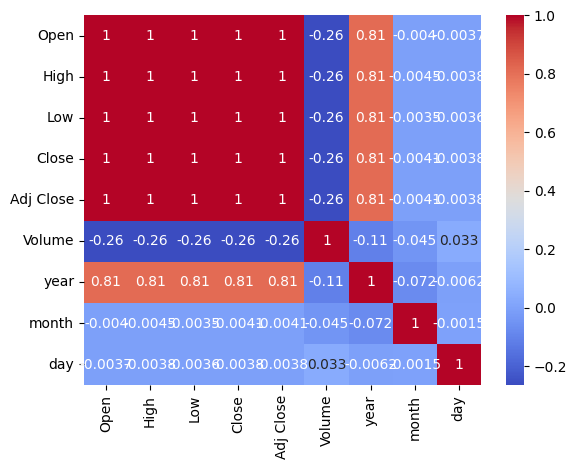

In [69]:
sns.heatmap(corr,annot=True,cmap='coolwarm',cbar='true')


##Data Scatterness

<Axes: xlabel='Open', ylabel='Close'>

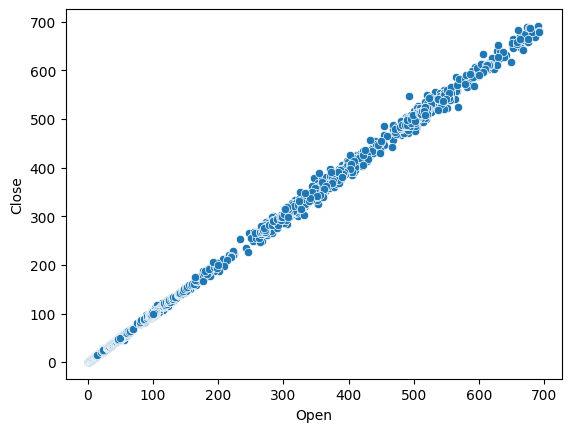

In [70]:
sns.scatterplot(x=netflix['Open'],y=netflix['Close'])

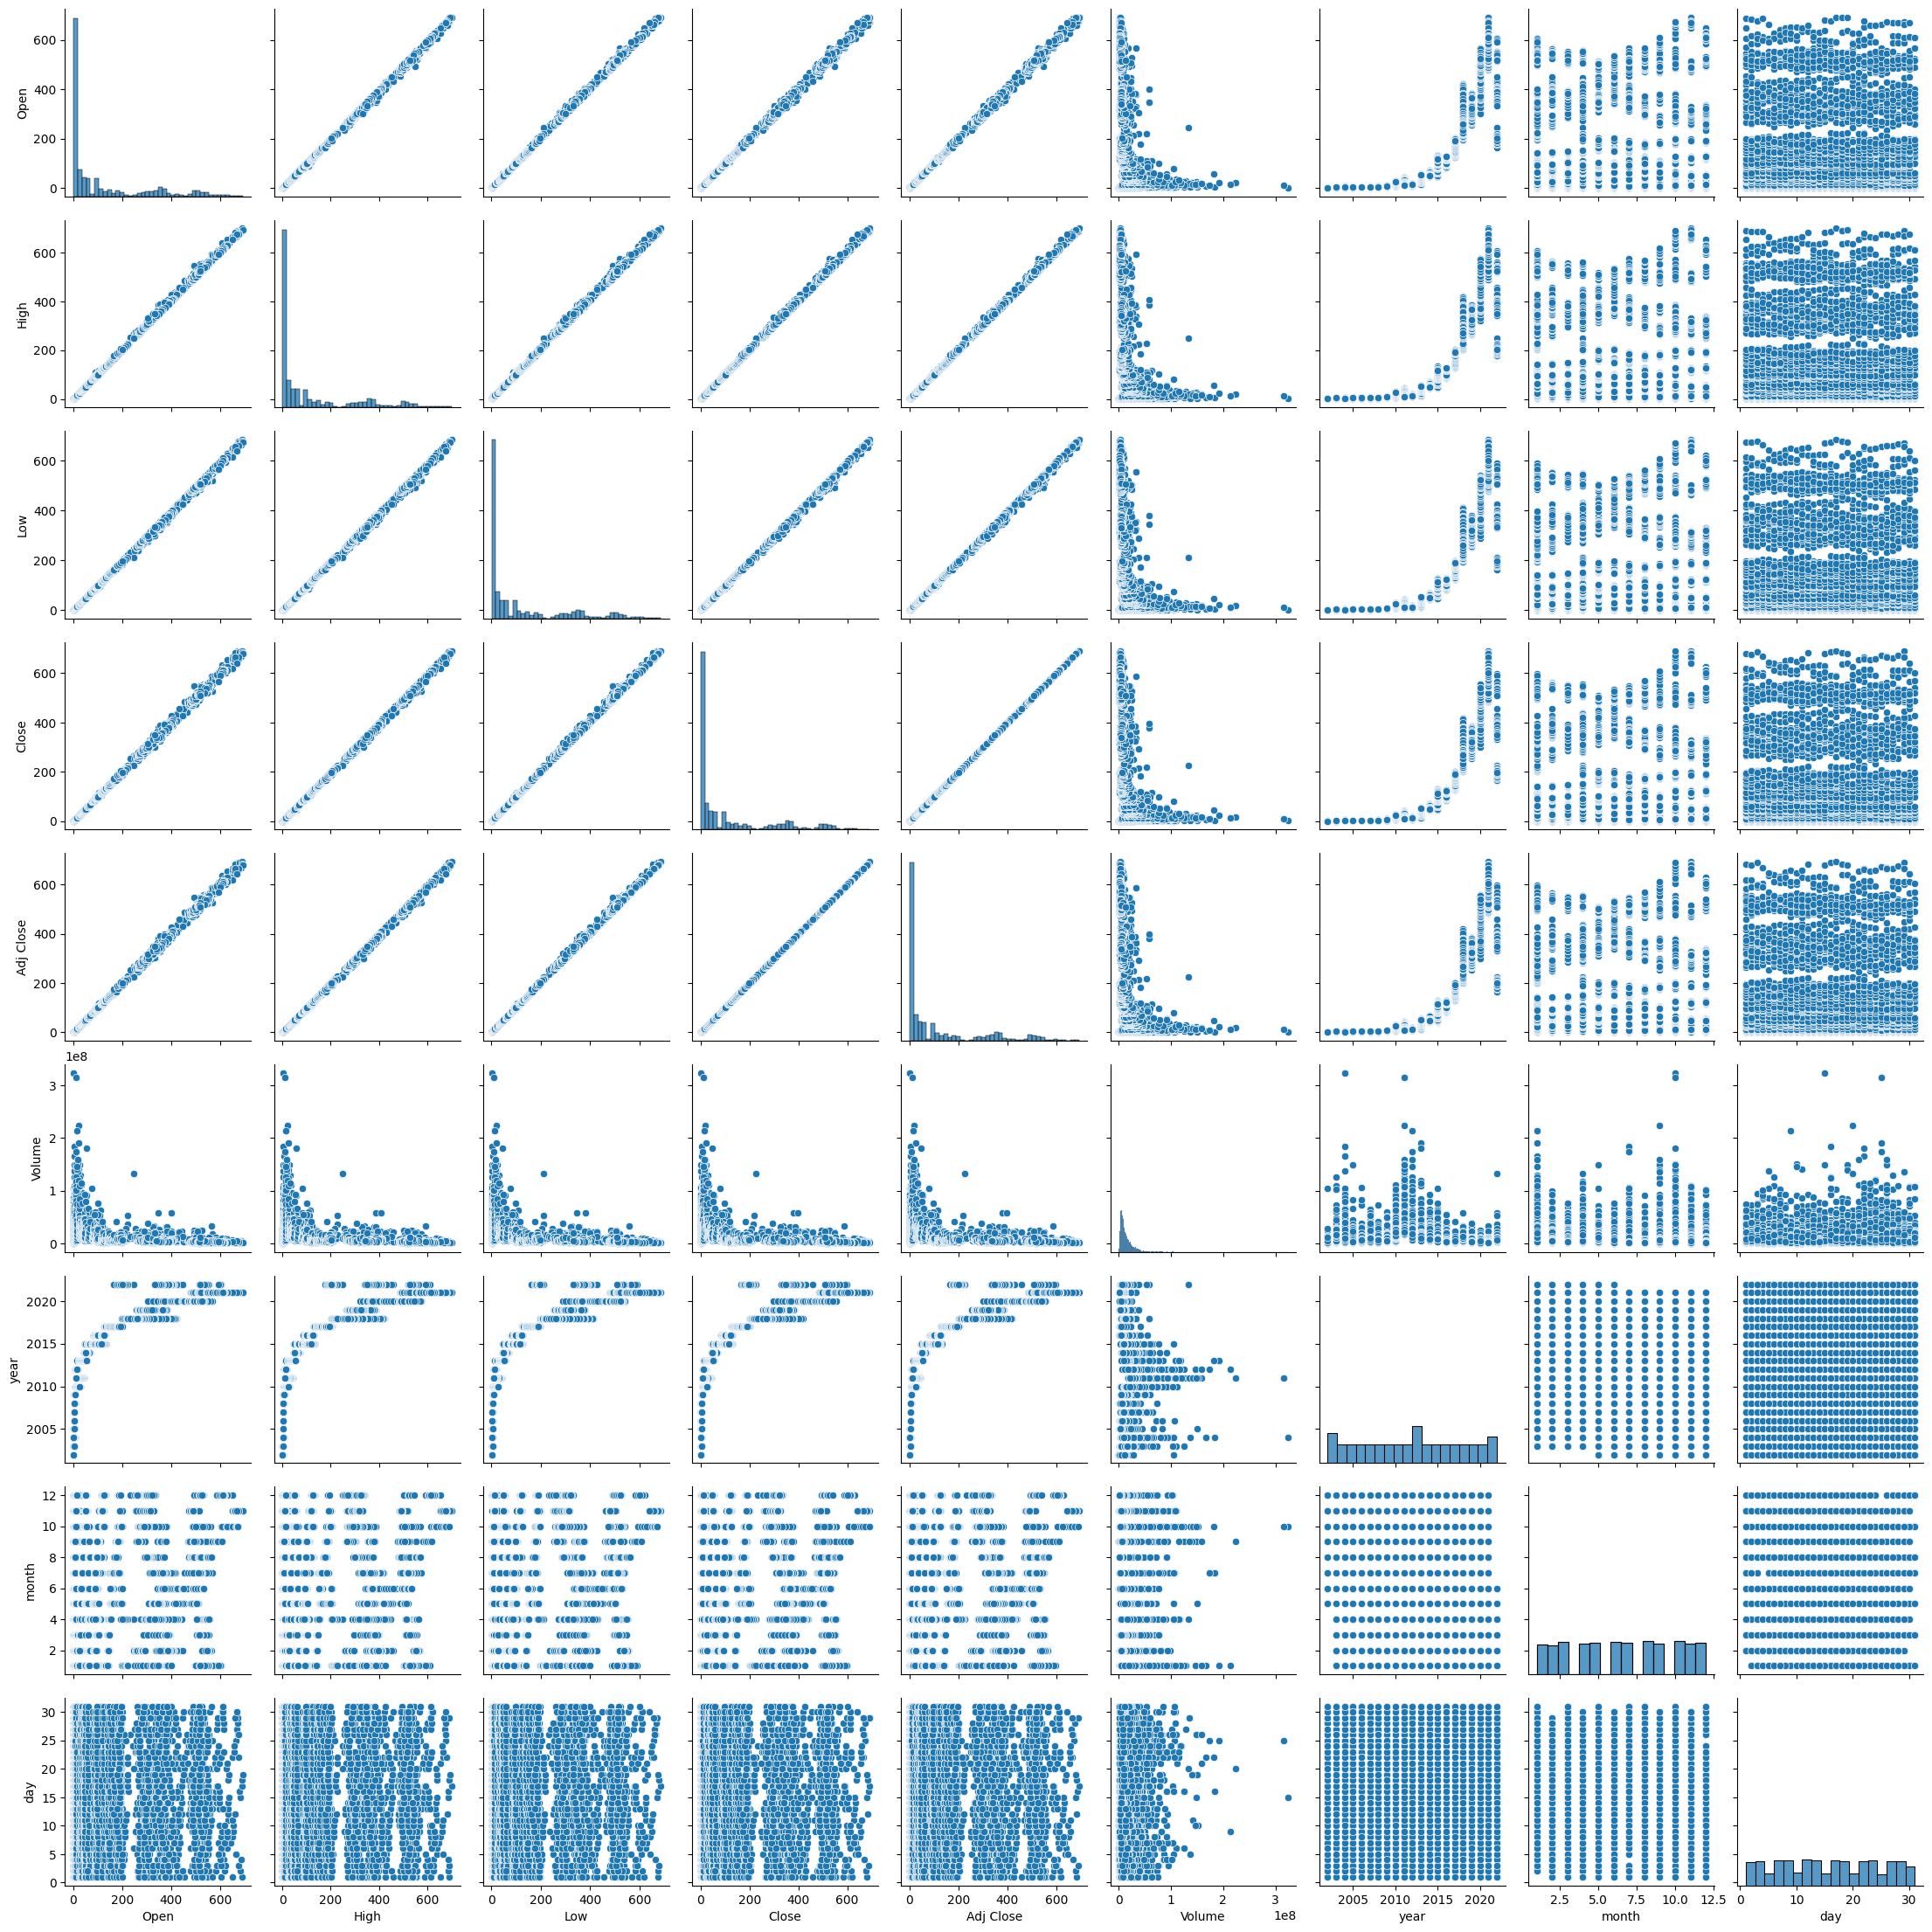

In [71]:
sns.pairplot(netflix)

##Data Distribution

C:\Users\yaduv\AppData\Local\Temp\ipykernel_9684\1719503055.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix['Close'])


<Axes: xlabel='Close', ylabel='Density'>

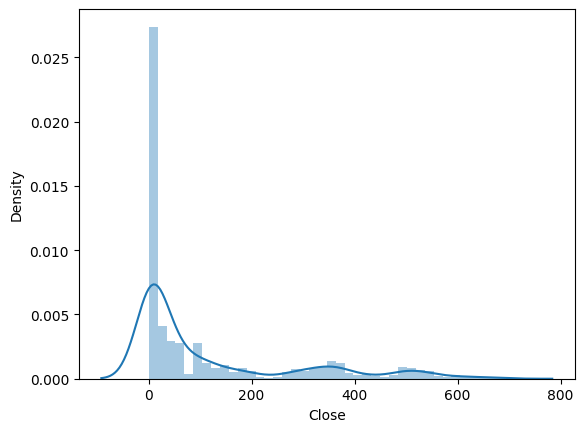

In [72]:
sns.distplot(netflix['Close'])

<Figure size 1000x600 with 0 Axes>

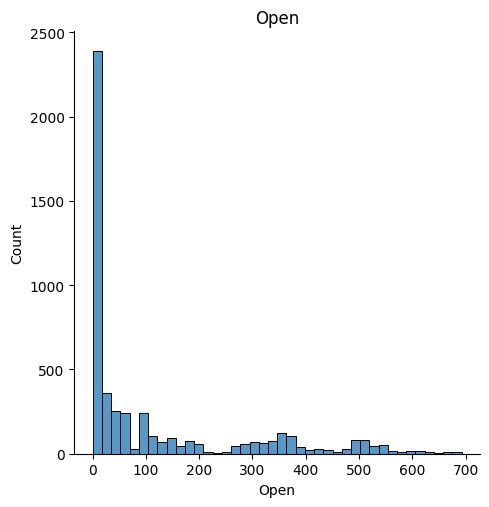

<Figure size 1000x600 with 0 Axes>

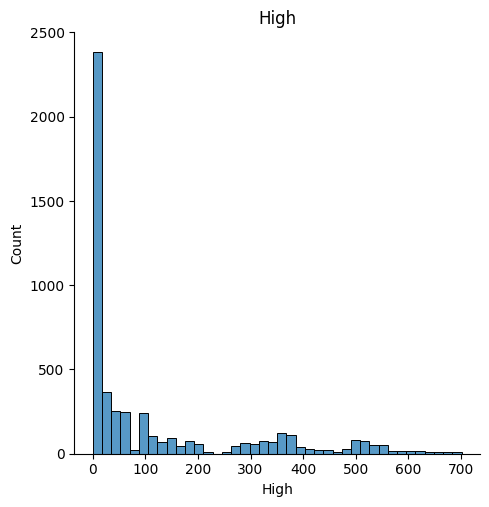

<Figure size 1000x600 with 0 Axes>

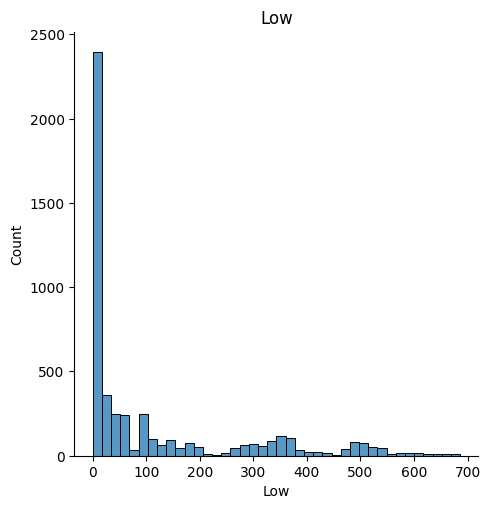

<Figure size 1000x600 with 0 Axes>

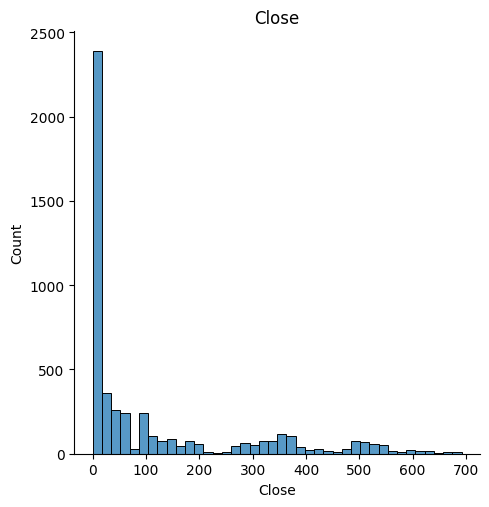

<Figure size 1000x600 with 0 Axes>

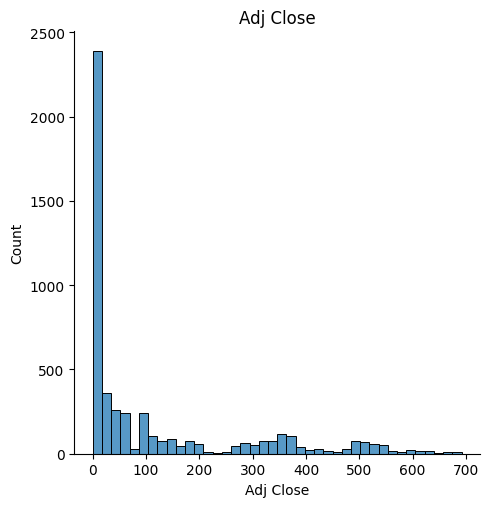

<Figure size 1000x600 with 0 Axes>

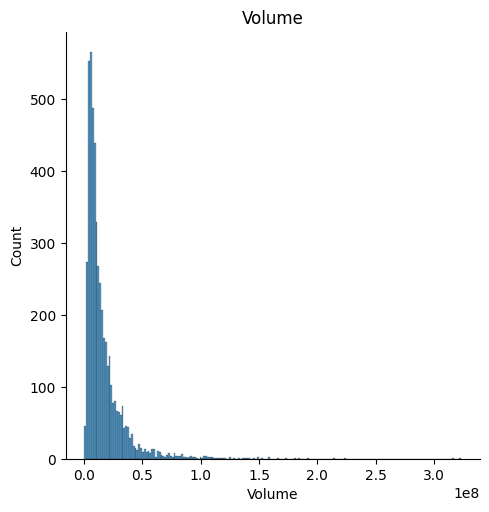

<Figure size 1000x600 with 0 Axes>

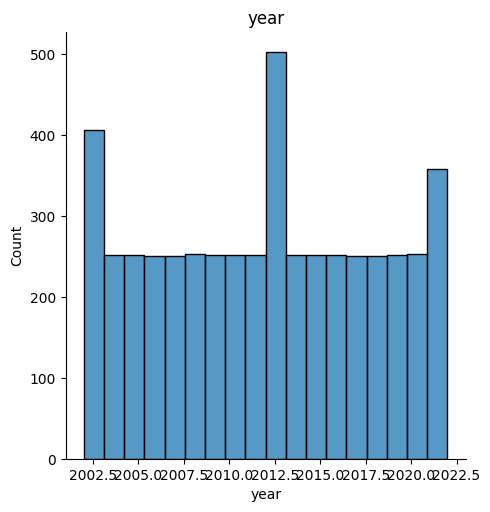

<Figure size 1000x600 with 0 Axes>

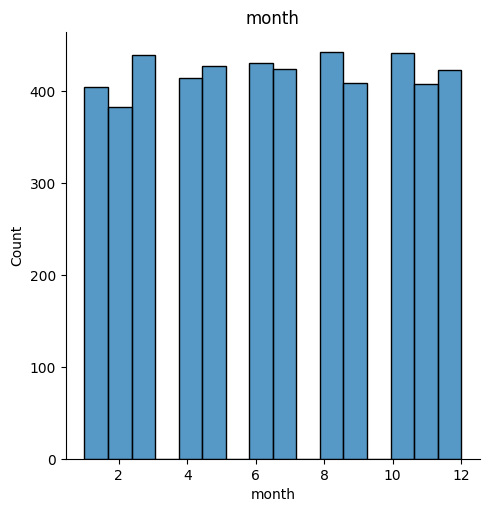

<Figure size 1000x600 with 0 Axes>

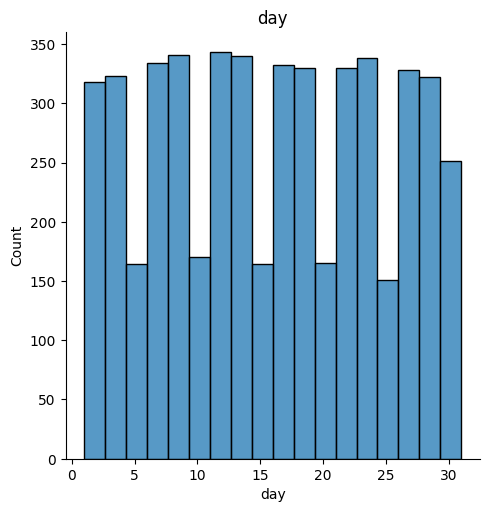

In [73]:
for i in netflix.columns:
  plt.figure(figsize=(10,6))
  sns.displot(netflix[i])
  plt.title(i)
  plt.show()

## MODEL CREATION AND TESTING

##Train Test Split

In [74]:
X=netflix.drop('Close',axis=1)
y=netflix['Close']

In [75]:
X.shape


(5044, 8)

In [76]:
y.shape

(5044,)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
X_train.shape

(4035, 8)

In [80]:
X_test.shape

(1009, 8)

##Normalization Data Using StandarScaler

In [81]:
X_train

,Open,High,Low,Adj Close,Volume,year,month,day
463,4.082857,4.274286,4.057143,4.228571,11066300,2004,3,25
2372,16.241428,16.732857,15.848571,16.719999,43923600,2011,10,21
1270,3.178571,3.235714,3.115714,3.132857,18034800,2007,6,11
2146,28.285713,29.542856,27.935715,29.414286,83170500,2010,11,30
594,2.492857,2.515714,2.272857,2.332857,50051400,2004,10,1
...,...,...,...,...,...,...,...,...
4426,335.000000,338.000000,330.600006,336.899994,9914900,2019,12,20
466,4.750000,4.977143,4.685714,4.910000,28010500,2004,3,30
3092,68.444283,68.812859,67.447144,67.524284,11958800,2014,9,4
3772,158.089996,158.779999,153.000000,153.199997,8184500,2017,5,17


In [82]:
from sklearn.preprocessing import StandardScaler
sclr=StandardScaler()

In [83]:
X_train=sclr.fit_transform(X_train)
X_test=sclr.transform(X_test)

In [84]:
X_train

array([[-0.67379391, -0.67366752, -0.67304256, ..., -1.37819916,
        -1.03362997,  1.05593422],
       [-0.602538  , -0.6016949 , -0.60286468, ..., -0.17115311,
         1.00640067,  0.60035459],
       [-0.67909352, -0.67966731, -0.67864557, ..., -0.86089371,
        -0.15933112, -0.53859448],
       ...,
       [-0.29660059, -0.30083097, -0.29577051, ...,  0.34615235,
         0.71496772, -1.33585882],
       [ 0.22877253,  0.21890531,  0.21340604, ...,  0.8634578 ,
        -0.45076407,  0.14477496],
       [-0.67490741, -0.67549964, -0.67544021, ..., -1.20576401,
         1.00640067,  0.48645968]])

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import Lasso , Ridge , SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct , WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [86]:
# Initialzing empty lists to store mean absolute error and mean squared error
ms= []
ma= []
score=[]
mse=mean_squared_error
mae=mean_absolute_error

In [87]:
def model_training_and_score(model):
    model.fit(X_train, y_train)
    y_pred= np.nan_to_num(model.predict(X_test))
    print(mse(y_pred,y_test))
    print(mse(y_pred,y_test))
    ms.append(mse(y_pred,y_test)) 
    ma.append(mae(y_pred,y_test))
    print(r2_score(y_test,y_pred))
    score.append(r2_score(y_test,y_pred))


## 1.Random forest regressor

In [88]:
model = RandomForestRegressor(n_estimators=5)
model_training_and_score(model)

0.3627680188225412
0.3627680188225412
0.9999858467982088


## 2. Lasso Regression

In [89]:
model=Lasso(alpha=0.1)
model_training_and_score(model)

6.689096335725461
6.689096335725461
0.9997390284552982


c:\Users\yaduv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.957e+04, tolerance: 1.175e+04
  model = cd_fast.enet_coordinate_descent(


## 3. Stochastic Gradient Descent

In [90]:
model=SGDRegressor()
model_training_and_score(model)

3.7390155529963915
3.7390155529963915
0.999854124291899


## 4. Ridge Regression

In [91]:
model=Ridge()
model_training_and_score(model)

0.9887436612296475
0.9887436612296475
0.9999614246906257


## 5.Decision Tree Regressor

In [92]:
model=DecisionTreeRegressor()
model_training_and_score(model)

0.36641418913299406
0.36641418913299406
0.9999857045448085


## 6. K Neighbors Regressor

In [93]:
model=KNeighborsRegressor()
model_training_and_score(model)

73.35582354581867
73.35582354581867
0.9971380614625946


## 7. Radius Neighbors Regressor

In [94]:
model=RadiusNeighborsRegressor()
model_training_and_score(model)

142.27078499686846
142.27078499686846
0.9944493808037596


c:\Users\yaduv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


### Plotting Losses Of Different models

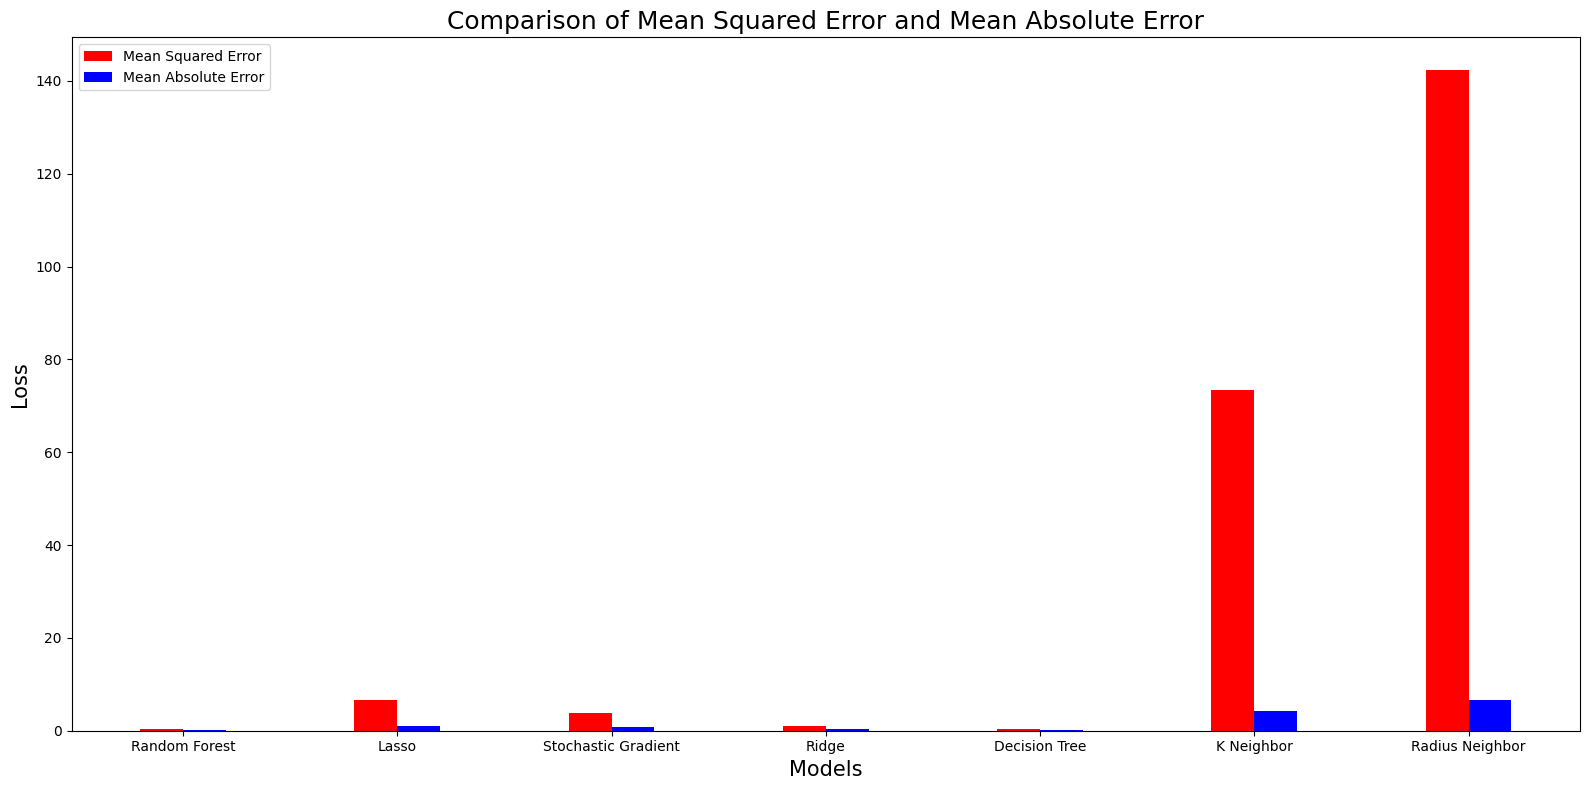

In [95]:
barwidth = 0.2
fig, ax = plt.subplots(figsize=(16, 8))

# Create bar positions
br1 = np.arange(len(ms))
br2 = [x + barwidth for x in br1]

# Create bars
plt.bar(br1, ms, color='red', width=barwidth, label='Mean Squared Error')
plt.bar(br2, ma, color='blue', width=barwidth, label='Mean Absolute Error')

# Add labels and title
plt.xlabel('Models', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('Comparison of Mean Squared Error and Mean Absolute Error', fontsize=18)

# Set x-ticks
models = ['Random Forest', 'Lasso', 'Stochastic Gradient', 'Ridge', 'Decision Tree', 'K Neighbor', 'Radius Neighbor']
plt.xticks([r + barwidth / 2 for r in range(len(ms))], models)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

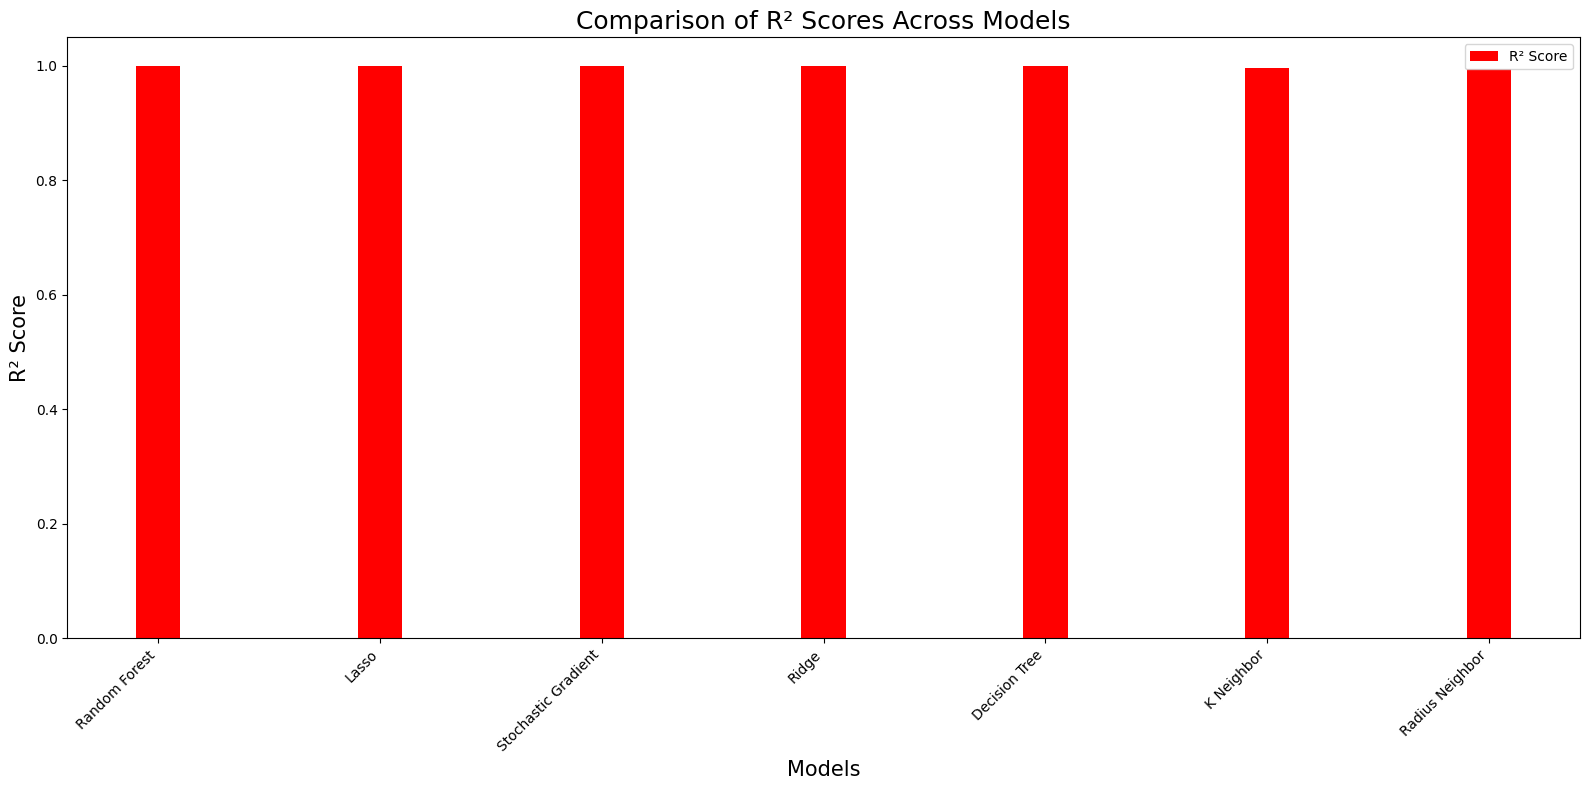

In [96]:
def plot_r2_scores(models, scores, bar_width=0.2):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(16, 8))

    # Create bar positions
    bar_positions = np.arange(len(models))

    # Create bars
    ax.bar(bar_positions, scores, color='red', width=bar_width, label='R² Score')

    # Add labels and title
    ax.set_xlabel('Models', fontsize=15)
    ax.set_ylabel('R² Score', fontsize=15)
    ax.set_title('Comparison of R² Scores Across Models', fontsize=18)

    # Set x-ticks with model names
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(models, rotation=45, ha='right')

    # Add legend
    ax.legend()

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Call the function to plot
plot_r2_scores(models, score)

#### here we choose Decision tree regression to predict the stock price 

## Prediction Model

In [97]:
def pred(Open,High,Low,Adj_Close,Volume,year,month,day):
  features=np.array([[Open,High,Low,Adj_Close,Volume,year,month,day]])
  features=sclr.transform(features)
  dc=DecisionTreeRegressor()
  dc=dc.fit(X_train,y_train)
  prediction= dc.predict(features).reshape(1,-1)
  return prediction[0]


In [98]:
netflix.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'year', 'month',
       'day'],
      dtype='object')

In [99]:
Open=100.10
High=290.45
Low=78.3
Adj_Close=258.34
Volume=220.45
year=2024
month=1
day=14
res= pred(Open,High,Low,Adj_Close,Volume,year,month,day)
res

c:\Users\yaduv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([205.630005])

In [100]:
print(res)

[205.630005]
